In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge

## Question 1

In [2]:
beta = [0.68, 2, -1.5, 1]
a_prime = np.array([1.2, -0.3, 4.5])
true_param = np.multiply(beta[1:], a_prime)
n_trials = 1000
n_obs = 50

In [3]:
beta_hats1 = np.zeros((n_trials, 3))
beta_hats2 = np.zeros((n_trials, 3))

for trial in range(n_trials):
    X = np.zeros((n_obs, 5))
    X[:, 0] = np.random.normal(0, 1, n_obs)
    X[:, 1] = np.random.normal(5, 1, n_obs)
    X[:, 2] = np.random.normal(7, 2, n_obs)
    X[:, 3] = X[:, 0]**2
    X[:, 4] = X[:, 0]**3
    y_true = beta[0] + X[:, :3].dot(beta[1:]) + np.random.randn(n_obs)

    # Method 1: cubic regression using only X1
    x_method1 = X[:, [0, 3, 4]]
    model_1 = sm.OLS(y_true, x_method1).fit()
    beta_hats1[trial, :] = model_1.params

    # Method 2: X1, X2, and X3 
    x_method2 = X[:, :3]
    model_2 = sm.OLS(y_true, x_method2).fit()
    beta_hats2[trial, :] = model_2.params 

a_prime_beta_hat1 = np.sort(np.multiply(a_prime, beta_hats1), axis=0)
a_prime_beta_hat2 = np.sort(np.multiply(a_prime, beta_hats2), axis=0)

ci_1 = [(a_prime_beta_hat1[25, i], a_prime_beta_hat1[975, i]) for i in range(3)]
ci_2 = [(a_prime_beta_hat2[25, i], a_prime_beta_hat2[975, i]) for i in range(3)]

print("True Parameters")
print("\n")
print("\t", "Value", sep="\t")
print("-"*35)
print("a' beta[1]", round(true_param[0], 3), sep="\t")
print("a' beta[2]", round(true_param[1], 3), sep="\t")
print("a' beta[3]", round(true_param[2], 3), sep="\t")

print("\n")

print("Method One: 95% Confidence Intervals")
print('\n')
print("\t", "2.5%", "97.5%", sep='\t')
print("-"*35)
print("a' beta[1]", round(ci_1[0][0], 3), round(ci_1[0][1], 3), sep='\t')
print("a' beta[2]", round(ci_1[1][0], 3), round(ci_1[1][1], 3), sep='\t')
print("a' beta[3]", round(ci_1[2][0], 3), round(ci_1[2][1], 3), sep='\t')

print('\n')

print("Method Two: 95% Confidence Intervals")
print('\n')
print("\t", "2.5%", "97.5%", sep='\t')
print("-"*35)
print("a' beta[1]", round(ci_2[0][0], 3), round(ci_2[0][1], 3), sep='\t')
print("a' beta[2]", round(ci_2[1][0], 3), round(ci_2[1][1], 3), sep='\t')
print("a' beta[3]", round(ci_2[2][0], 3), round(ci_2[2][1], 3), sep='\t')

True Parameters


		Value
-----------------------------------
a' beta[1]	2.4
a' beta[2]	0.45
a' beta[3]	4.5


Method One: 95% Confidence Intervals


		2.5%	97.5%
-----------------------------------
a' beta[1]	0.646	4.122
a' beta[2]	-0.198	0.159
a' beta[3]	-2.317	2.854


Method Two: 95% Confidence Intervals


		2.5%	97.5%
-----------------------------------
a' beta[1]	2.036	2.761
a' beta[2]	0.372	0.476
a' beta[3]	4.14	5.162


Method 2 captures the true parameter more than Method 1. You can see from the tables that Method 1 doesn't contain the true values of the parameters often (if at all) in the interval, whereas Method 2 does in all cases. 

## Question 2

In [4]:
data = pd.read_table("/Users/davidtoth/Downloads/prostate.data.txt")
data = data.iloc[:, 1:]

train_data = data[data.train == "T"].iloc[:, :-1]
test_data = data[data.train == "F"].iloc[:, :-1]

xtrain = train_data.drop("lcavol", axis=1)
ytrain = train_data["lcavol"]

xtest = test_data.drop("lcavol", axis=1)
ytest = test_data["lcavol"]

### Eigenvalues

### PLS

In [5]:
pls_model = PLSRegression().fit(xtrain, ytrain)
yhat_pls = pls_model.predict(xtest).flatten()
mse_pls = ((yhat_pls - ytest)**2).mean()
print("MSE of PLS on test set: ", round(mse_pls, 4))

MSE of PLS on test set:  0.5662


### PCR

In [6]:
pca = PCA()
x_train_pca = pca.fit_transform(scale(xtrain))
pca_model = LinearRegression().fit(x_train_pca, ytrain)
yhat_pca = pca_model.predict(pca.transform(scale(xtest))).flatten()
mse_pca = ((yhat_pca - ytest)**2).mean()
print("MSE of PCR on test set: ", round(mse_pca, 4))

MSE of PCR on test set:  0.5669


### Ridge

In [7]:
ridge_model = Ridge().fit(xtrain, ytrain)
yhat_ridge = ridge_model.predict(xtest).flatten()
mse_ridge = ((yhat_ridge - ytest)**2).mean()
print("MSE of Ridge on test set: ", round(mse_ridge, 4))

MSE of Ridge on test set:  0.503


## Question 6

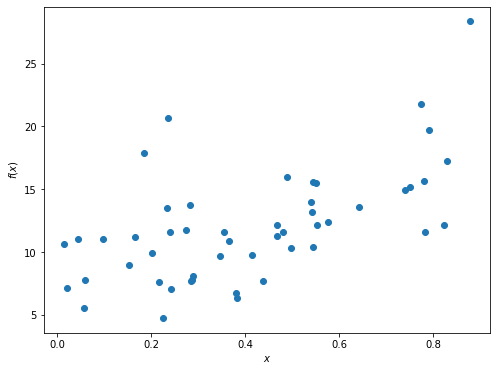

In [8]:
# Generate data 
n = 50
x_obs = np.random.rand(n)
x_sq = x_obs**2
beta_0 = 3
beta_1 = 2
y = beta_0 + beta_1*x_sq + 0.5*np.random.randn(n)
y_obs = y**2

plt.figure(figsize=(8,6))
plt.scatter(x_obs, y_obs)
plt.xlabel("$x$")
plt.ylabel("$f(x)$");

### Part 1: Fit $y = \beta_0 + \beta_1 x + \epsilon$. 

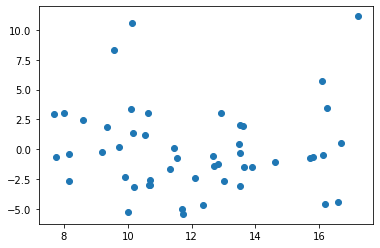

In [9]:
model1 = sm.OLS(y_obs, sm.add_constant(x_obs)).fit()
plt.scatter(model1.fittedvalues, model1.resid);

It seems like a quadratic model is in order based on the curvature in the residuals. 

### Part 2: Fit $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$.

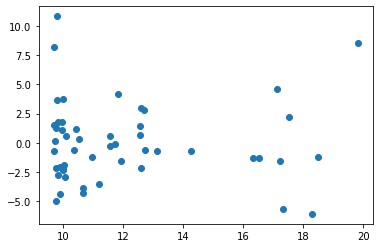

In [10]:
new_x = x_obs[:, np.newaxis]**(1,2)
model2 = sm.OLS(y_obs, sm.add_constant(new_x)).fit()
plt.scatter(model2.fittedvalues, model2.resid);

The residual variance increases with the mean of fitted values. 

### Part 3: Fit $y^{1/2} = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$.

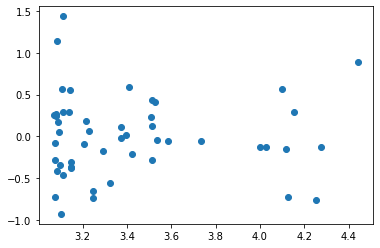

In [11]:
# fit y^(1/2) = b0 + b1 x + b2 x^2 + e
new_y = np.sqrt(y_obs)
model3 = sm.OLS(new_y, sm.add_constant(new_x)).fit()
plt.scatter(model3.fittedvalues, model3.resid);

The residuals seem to be evenly distributed (have constant variance) across the fitted values. Note the narrow scale on the y-axis (roughly -1 to 1), whereas the previous model had a much wider scale. 

### Part 4: Fit $\omega = \frac{y^{\lambda} - 1}{\lambda} = \beta_0 + \beta_1 x + \beta_2 ^2 + \epsilon$.

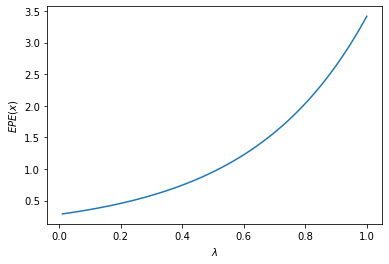

In [12]:
lambda_grid = np.linspace(0.01, 1, 100)
epe = np.zeros_like(lambda_grid)

for index, lambda_val in enumerate(lambda_grid):
    y_mod = (np.power(y_obs, lambda_val) - 1) / lambda_val 
    model_ = sm.OLS(y_mod, sm.add_constant(new_x)).fit()
    epe[index] = np.sqrt(np.mean((model_.fittedvalues - y_mod)**2))

plt.plot(lambda_grid, epe)
plt.xlabel("$\lambda$")
plt.ylabel("$EPE(x)$");

The value of $\lambda$ at which the EPE is minimized is approximately 0.01, i.e., the smallest value in the grid. 

## Question 7

In [13]:
chebyshev_polys = [lambda x: 1, 
                   lambda x: x, 
                   lambda x: 2*x**2 - 1, 
                   lambda x: 4*x**3 - 3*x, 
                   lambda x: 8*x**4 - 8*x**2 + 1,
                   lambda x: 16*x**5 - 20*x**3 + 5*x]

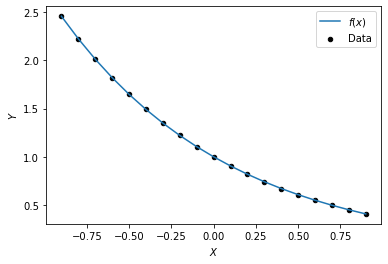

In [14]:
# Generate data and plot 
x = np.linspace(-0.9, 0.9, 19)
y = np.exp(-x)

plt.plot(x, y, label="$f(x)$")
plt.scatter(x, y, s=20, c="k", label="Data")
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.legend();

In [15]:
# Create covariate matrix using Chebyshev 
# polynomials 
t_x = np.zeros((len(x), 6))

for i in range(6):
    t_x[:, i] = chebyshev_polys[i](x)

In [16]:
# Use least squares to solve for c_k's 
coefs = np.linalg.lstsq(t_x, y, rcond=None)[0]

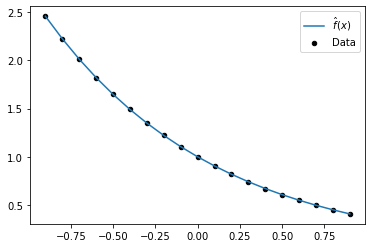

In [17]:
# Plot the fitted function and the data
plt.plot(x, t_x@coefs, label="$\hat f(x)$")
plt.scatter(x, y, c="k", s=20, label="Data")
plt.legend();

## Question 8

In [18]:
def fit_chebyshev(x, y, degree):
    covariate_matrix = np.zeros((len(x), degree))

    for i in range(degree):
        covariate_matrix[:, i] = chebyshev_polys[i](x)

    coefs = np.linalg.lstsq(covariate_matrix, y, rcond=None)[0]
    y_fit = covariate_matrix @ coefs 

    return coefs, y_fit

def eval_chebyshev(x, coefs):
    X = np.zeros((len(x), len(coefs)))

    for i in range(len(coefs)):
        X[:, i] = chebyshev_polys[i](x)

    vals = X @ coefs 

    return vals 

Fitted coefficients:  [1.26604783e+00 1.13031110e+00 2.71459497e-01 4.43318506e-02
 5.43756987e-03 5.40059584e-04]


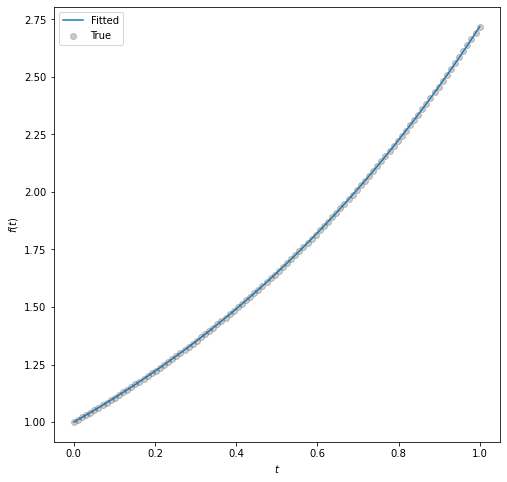

In [19]:
def f(t):
    return np.exp(t)

t = np.random.uniform(-1, 1, 100)
y_t = f(t)

chebyshev_coefs, chebyshev_fitted_vals = fit_chebyshev(t, y_t, 6)

print("Fitted coefficients: ", chebyshev_coefs)

new_t = np.linspace(0, 1, 100)
new_y_t = f(new_t)
fitted_vals = eval_chebyshev(new_t, chebyshev_coefs)


plt.figure(figsize=(8, 8))
plt.scatter(new_t, new_y_t, c="k", alpha=0.2, label="True")
plt.plot(new_t, fitted_vals, label="Fitted")
plt.xlabel("$t$")
plt.ylabel("$f(t)$")
plt.legend();

In [20]:
error_at_zero = fitted_vals[0] - new_y_t[0]
mse = np.mean((fitted_vals - new_y_t)**2)
print("Error at t = 0: ", error_at_zero)
print("MSE: ", mse)

Error at t = 0:  2.5900969182313105e-05
MSE:  1.1048122895282882e-09
